<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Image_cnn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Get the dataset**

In [13]:
!pip install tensorflow keras
!pip install kaggle

In [1]:
#Importing my plantvillage from kaggle for CNN
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
#Unzipping the dataset
!unzip -q plantvillage-dataset.zip

replace plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Load the data with ImageDataGenerator**

In [17]:
#ImageDataGeneratir is used to load and preprocess the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale images(normalize pixel values to 0-1 range) and apply augmentaion
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [18]:
#Load the training data
train_data = train_datagen.flow_from_directory('/content/plantvillage dataset',
                                               target_size =(150, 150),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               subset='training')

Found 130333 images belonging to 3 classes.


In [19]:
#Loading the validation data
validation_data = train_datagen.flow_from_directory('/content/plantvillage dataset',
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    subset = 'validation')

Found 32583 images belonging to 3 classes.


## **BUILD THE CNN MODEL**

In [25]:
from tensorflow.keras import layers, models

#Initialize the CNN model
model = models.Sequential()

#Add convolution and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten the data for fully connected layers
model.add(layers.Flatten())

#Add dense layers
model.add(layers.Dense(512, activation = 'relu'))

#Output layer
model.add(layers.Dense(train_data.num_classes, activation = 'softmax'))

## **Compile the model**

In [26]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## **Train the model**

In [27]:
history = model.fit(train_data,
                    steps_per_epoch = train_data.batch_size,
                    epochs = 10,
                    validation_data= validation_data,
                    validation_steps = validation_data.batch_size)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6727 - loss: 1.2499 - val_accuracy: 0.6885 - val_loss: 0.9301
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9377 - loss: 0.1966 - val_accuracy: 0.8486 - val_loss: 0.6723
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9860 - loss: 0.0984 - val_accuracy: 0.9307 - val_loss: 0.2903
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9888 - loss: 0.0584 - val_accuracy: 0.9053 - val_loss: 0.3432
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9978 - loss: 0.0151 - val_accuracy: 0.9131 - val_loss: 0.3640
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9043 - val_loss: 0.4155
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9915 - loss: 0.0233 - val_accuracy: 0.8779 - val_loss: 0.6938
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9787 - loss: 0.0811 - val_accuracy: 0.9150 - val_loss: 0.6657
Epo

## **Visualize Training Perfomance**

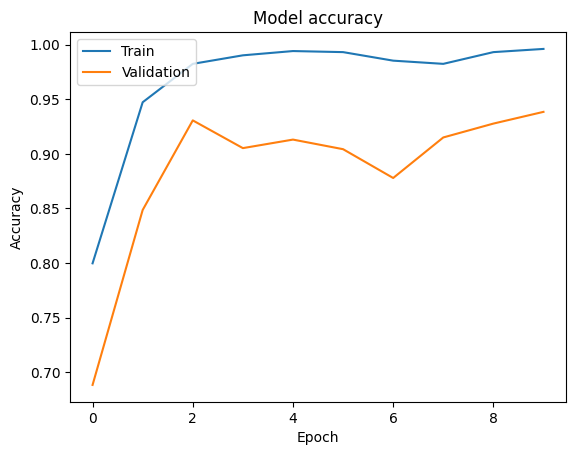

In [28]:
import matplotlib.pyplot as plt

#Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



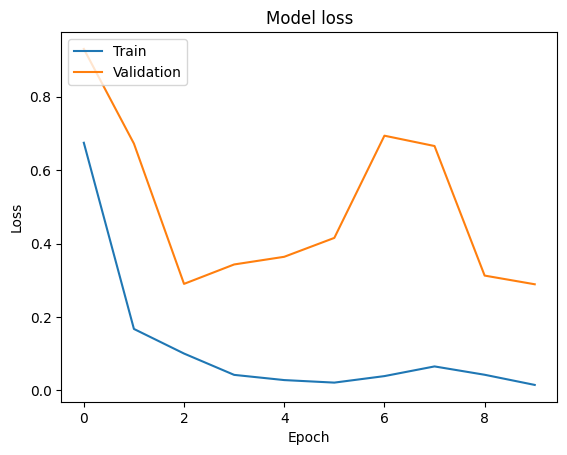

In [29]:
#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Evaluate the model**

In [30]:
test_datagen = ImageDataGenerator()

test_data = test_datagen.flow_from_directory('/content/plantvillage dataset',
                                             target_size = (150, 150),
                                             batch_size = 32,
                                             class_mode = 'categorical')

test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

Found 162916 images belonging to 3 classes.
5092/5092 ━━━━━━━━━━━━━━━━━━━━ 1530s 301ms/step - accuracy: 0.9416 - loss: 24.0587
Test accuracy: 0.9413256049156189


## **Make Predictions**


In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Load and preprocess a single image
img = image.load_img('/content/plantvillage dataset/color/Corn_(maize)___Northern_Leaf_Blight', target_size=(150, 150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis =0)

# Make prediction
prediction = model.predict(img_array)
print(f"Predicted class: {np.argmax(prediction)}")

IsADirectoryError: [Errno 21] Is a directory: '/content/plantvillage dataset/color/Corn_(maize)___Northern_Leaf_Blight'

In [32]:
import os
os.listdir('/content/plantvillage dataset/color')

from PIL import Image
Image.open('/content/plantvillage dataset/color/Corn_(maize)___Northern_Leaf_Blight')

IsADirectoryError: [Errno 21] Is a directory: '/content/plantvillage dataset/color/Corn_(maize)___Northern_Leaf_Blight'